Importando do keras o databse fashion_mnist

In [40]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random
from keras.datasets import fashion_mnist
from math import sqrt

In [3]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [4]:
trainX.shape

(60000, 28, 28)

In [5]:
testX.shape

(10000, 28, 28)

In [6]:
trainy.shape

(60000,)

In [7]:
testy.shape

(10000,)

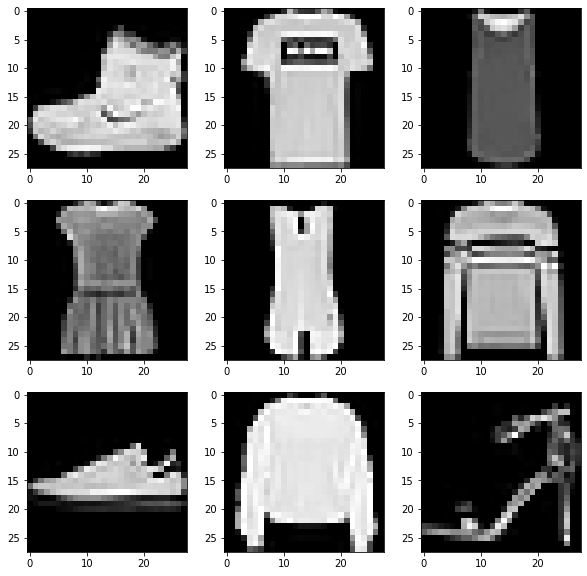

In [8]:
# plotando as primeiras imagens
plt.figure(figsize=(10,10))
for i in range(9):
	plt.subplot(330 + 1 + i)
	# plotando os dados originais
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show();

In [9]:
X_train = np.reshape(trainX, (60000, 784))
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
X_test = np.reshape(testX, (10000, 784))
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
X_train_filt = X_train[: 6000, : ]
X_train_filt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
X_train_filt.shape

(6000, 784)

In [23]:
Y_train_filt = trainy[: 6000]
Y_train_filt.shape

(6000,)

In [25]:
# normalizando os dados

std_scaler = StandardScaler()
X_train_new = std_scaler.fit_transform(X_train_filt)
print(f'X : {X_train_new}')

X : [[-0.01700455 -0.02992612 -0.03077035 ... -0.16658356 -0.09668665
  -0.03395052]
 [-0.01700455 -0.02992612 -0.03077035 ... -0.16658356 -0.09668665
  -0.03395052]
 [-0.01700455 -0.02992612 -0.03077035 ... -0.16658356 -0.09668665
  -0.03395052]
 ...
 [-0.01700455 -0.02992612 -0.03077035 ... -0.16658356 -0.09668665
  -0.03395052]
 [-0.01700455 -0.02992612 -0.03077035 ... -0.16658356 -0.09668665
  -0.03395052]
 [-0.01700455 -0.02992612 -0.03077035 ... -0.16658356 -0.09668665
  -0.03395052]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


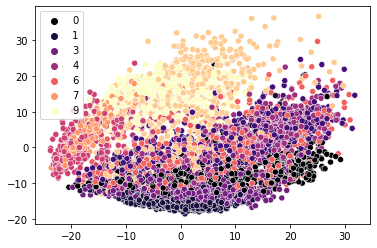

In [26]:
# PCA para 2 componentes
pca       = PCA(n_components=2)
dados_pca = pca.fit_transform(X_train_new)

sns.scatterplot(dados_pca[:, 0], dados_pca[:, 1], hue=Y_train_filt, palette='magma');

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


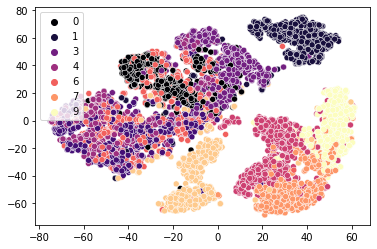

In [27]:
tsne       =  TSNE()
dados_tsne = tsne.fit_transform(X_train_new)

sns.scatterplot(dados_tsne[:, 0], dados_tsne[:, 1], hue=Y_train_filt, palette='magma');

In [28]:
# K-Means
kmeans = KMeans(n_clusters=10)
kmeans = kmeans.fit(dados_tsne)

In [29]:
# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
agglomerative = agglomerative.fit(dados_tsne)

In [30]:
# Labels definidos pelos agrupamentos
print(f'Kmeans: {kmeans.labels_}')
print(f'Aglomerative: {agglomerative.labels_}')

Kmeans: [7 3 6 ... 4 9 3]
Aglomerative: [2 6 0 ... 7 5 6]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


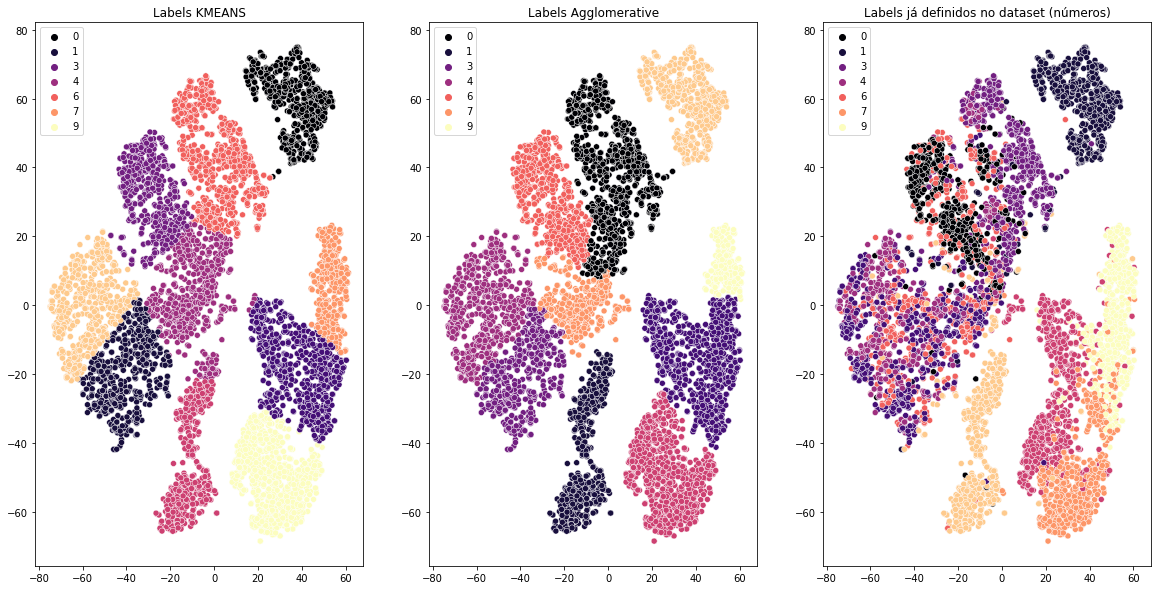

In [32]:
#Comparando os agrupamentos
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))


sns.scatterplot(dados_tsne[:, 0], dados_tsne[:, 1], hue=kmeans.labels_,        ax=ax[0], palette='magma')
sns.scatterplot(dados_tsne[:, 0], dados_tsne[:, 1], hue=agglomerative.labels_, ax=ax[1], palette='magma')
sns.scatterplot(dados_tsne[:, 0], dados_tsne[:, 1], hue=Y_train_filt,          ax=ax[2], palette='magma')

ax[0].set_title('Labels KMEANS')
ax[1].set_title('Labels Agglomerative');
ax[2].set_title('Labels já definidos no dataset (números)');

In [33]:
# Silhouette Score

kmeans_score        = silhouette_score(dados_tsne, kmeans.labels_)
agglomerative_score = silhouette_score(dados_tsne, agglomerative.labels_)

kmeans_score_rounded = round(kmeans_score,3)
agglomerative_score_rounded = round(agglomerative_score, 3)

In [34]:
print('K-means      : ',kmeans_score_rounded)
print('Agglomerative: ',agglomerative_score_rounded)

K-means      :  0.431
Agglomerative:  0.4


Novamente K-Means apresentou maior afastamento entre os cluster

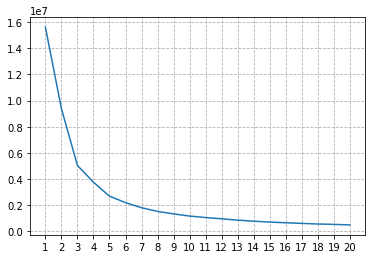

In [35]:
# Aplicando o método do cotovelo

scores = []

for k in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20):
    kmeans = KMeans(n_clusters=k, random_state=0,).fit(dados_tsne)
    scores.append(kmeans.inertia_)
    
plt.plot(range(len(scores)), scores)
plt.xticks(range(len(scores)), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])
plt.grid(True, linestyle='--')
plt.show();

In [36]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [37]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

In [42]:
# calculando a soma dos quadrados para os 20 clusters
sum_of_squares = calculate_wcss(X_train_new)

# calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(sum_of_squares)

print(f'Número ótimo de clusters {n}')

# rodando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(X_train_new)

Número ótimo de clusters 6
